## **Topic Modeling and Sentiment Analysis**

Instructions:
1.	Data Preprocessing:

    Clean and preprocess the text data (e.g., remove special characters, stop words, and perform tokenization).

2.	Topic Modeling:

    Use the Latent Dirichlet Allocation (LDA) model to identify topics from the dataset.
    Experiment with different numbers of topics and select the optimal one.
    Visualize Topics:
    Use pyLDAvis or similar libraries to visualize the topics.
    Generate Word Clouds for each topic to highlight the most frequent words.

3.	Sentiment Analysis:

    Use VADER to perform sentiment analysis on the preprocessed text data.
    Categorize sentiments into Positive, Negative, and Neutral.
    Visualize the distribution of sentiments across the entire dataset.

4.	Combining Topic Modeling and Sentiment Analysis:

    Analyze the sentiment within each identified topic.
    Visualize the sentiment distribution for each topic (e.g., using bar charts or pie charts).


## **Step 1: Data Preprocessing**

### **Load the dataset**

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'data/amazon_alexa_preprocessed.csv'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


ValueError: Excel file format cannot be determined, you must specify an engine manually.

### **Cleaning Data**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/git/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/git/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/git/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re

def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Update the cleaning function
def clean_text_alternative(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = simple_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return ' '.join(lemmatized_tokens)

data['cleaned_text'] = data['amazon_alexa Feedback'].apply(clean_text_alternative)


In [ ]:
# Display the first few cleaned texts to verify cleaning
data[['amazon_alexa Feedback', 'cleaned_text']].head()

,Airport Service Freeform Feedback,cleaned_text
0,Some confusion re what was happening as airlin...,confusion happening airline gate close togethe...
1,I booked the flight for my elderly parents. Al...,booked flight elderly parent although flying p...
2,The service was great and the Porter team were...,service great porter team polite efficient
3,NaN,
4,The service provided at both airports was very...,service provided airport good


## **Step 2: Topic Modeling**

### **1. Convert Text to Features:**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the cleaned text
dtm = vectorizer.fit_transform(data['cleaned_text'])  # Document-term matrix

### **2. Use LDA model to identify topics**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Number of topics
n_topics = 5  # You can change this number for different numbers of topics

# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)

# Fit the model on the document-term matrix
lda_model.fit(dtm)

,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


### **3. Visualize Topics**

**pyLDAvis**

In [ ]:
import sys
print(sys.executable)


/home/git/projects/Topic_Modeling_and_Sentiment_Analysis/topic-env/bin/python


In [ ]:
# /usr/bin/python3 -m pip install pyldavis 

**Word Clouds**

Topic #0:


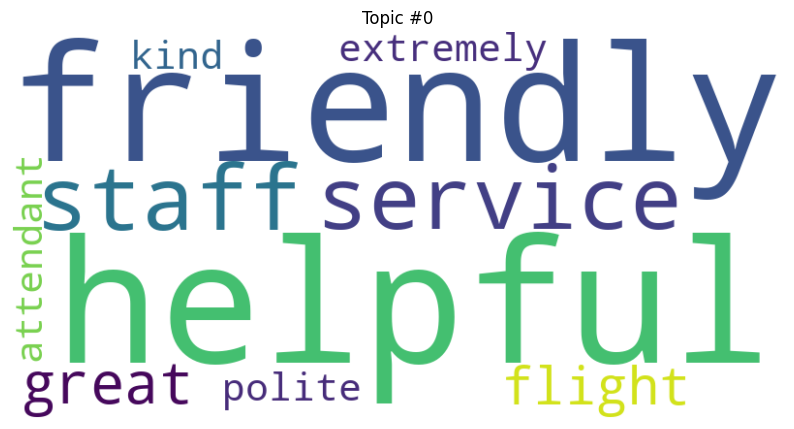

Topic #1:


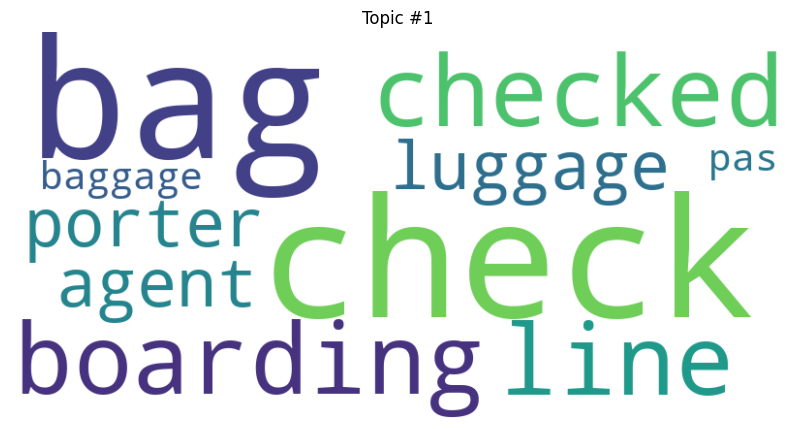

Topic #2:


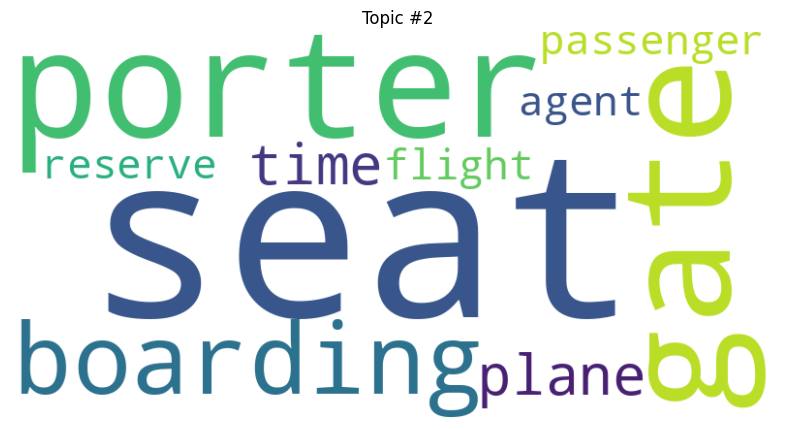

Topic #3:


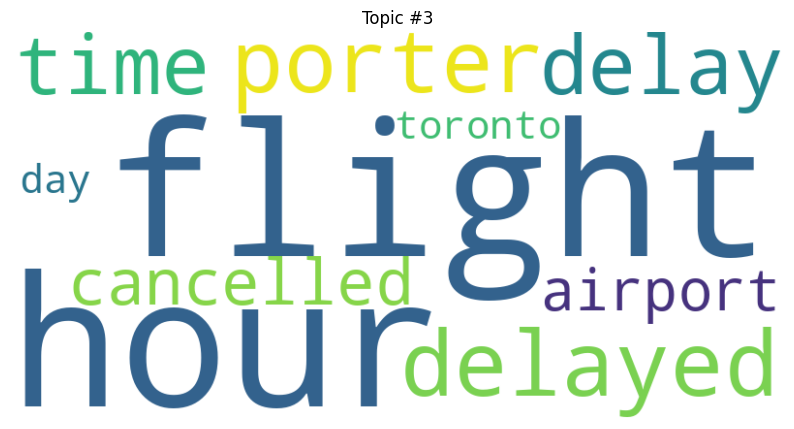

Topic #4:


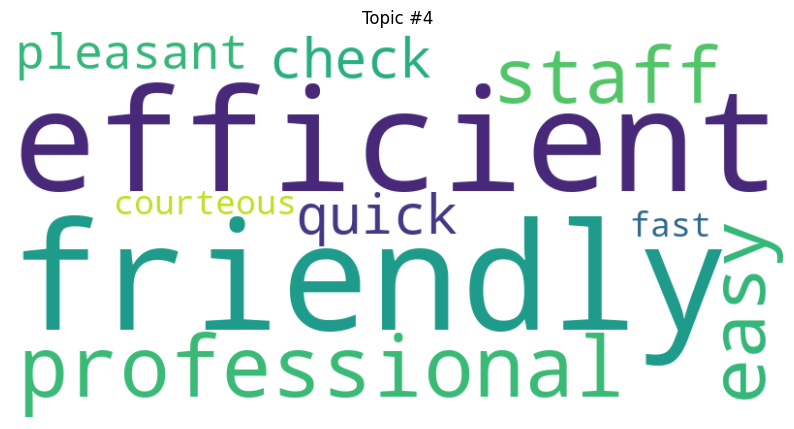

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each topic
for topic_idx, topic in enumerate(lda_model.components_):
    print("Topic #{}:".format(topic_idx))
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]  # Get top 10 words for this topic
    word_cloud = WordCloud(
        width = 800,
        height = 400,
        background_color ='white',
        stopwords = set(stopwords.words('english'))
    ).generate(" ".join(topic_words))

    plt.figure(figsize=(10, 7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Topic #{}'.format(topic_idx))
    plt.show()


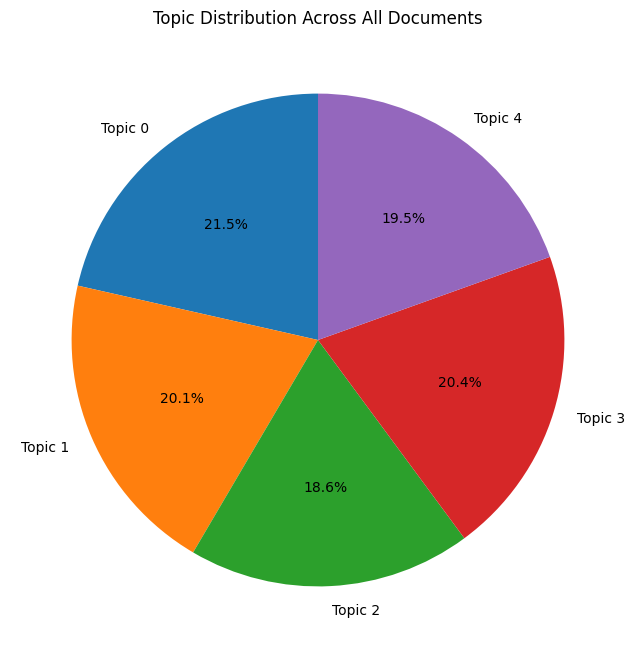

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the topic distribution for each document
# Assuming lda_model.transform(dtm) gives topic distribution
topic_distribution = lda_model.transform(dtm)

# Summing contributions of each topic across all documents
topic_totals = topic_distribution.sum(axis=0)

# Define labels for the topics
num_topics = topic_totals.shape[0]
labels = [f'Topic {i}' for i in range(num_topics)]

# Plotting pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(topic_totals, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)

ax.set_title('Topic Distribution Across All Documents')
plt.show()


## **Step 3: Sentiment Analysis**

### **1. Import and Initialize VADER**

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/git/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### **2. Apply VADER to Analyze Sentiments**

In [ ]:
# Function to categorize sentiment based on compound score
def get_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER and categorize sentiments
data['sentiments'] = data['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['sentiment_category'] = data['sentiments'].apply(get_sentiment)


### **3. Visualize Sentiment Distribution**

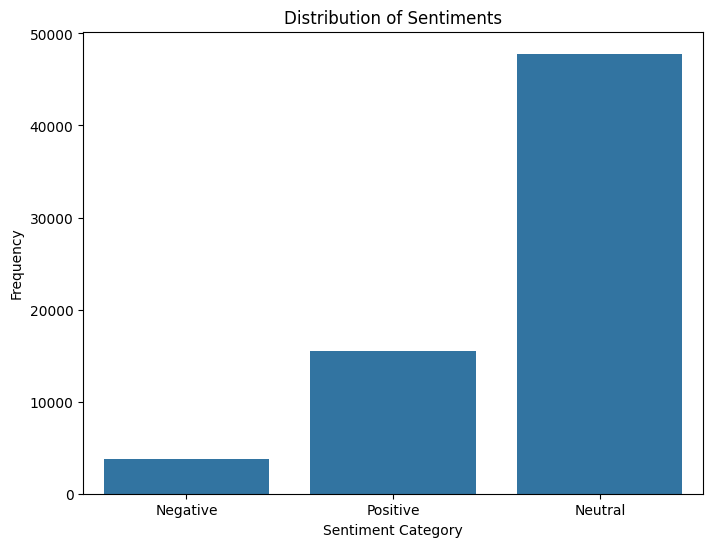

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting sentiment distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=data['sentiment_category'])
ax.set_title('Distribution of Sentiments')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Frequency')
plt.show()


## **Step 4: Combining Topic Modeling and Sentiment Analysis**

### **1. Assign Topics to Each Document**

In [ ]:
# Assign the topic with the highest contribution to each document
data['dominant_topic'] = np.argmax(topic_distribution, axis=1)


### **2. Analyze Topic-Sentiment Relationship**

In [ ]:
# Create a DataFrame to summarize the count of each sentiment category within each topic
topic_sentiment_distribution = data.groupby(['dominant_topic', 'sentiment_category']).size().unstack(fill_value=0)
print(topic_sentiment_distribution)


sentiment_category  Negative  Neutral  Positive
dominant_topic                                 
0                         72    44615      5554
1                        961     1205      2493
2                        604      588      2035
3                       2094      734      1893
4                         87      653      3509


### **3. Visualize the Sentiment Distribution Across Topics**

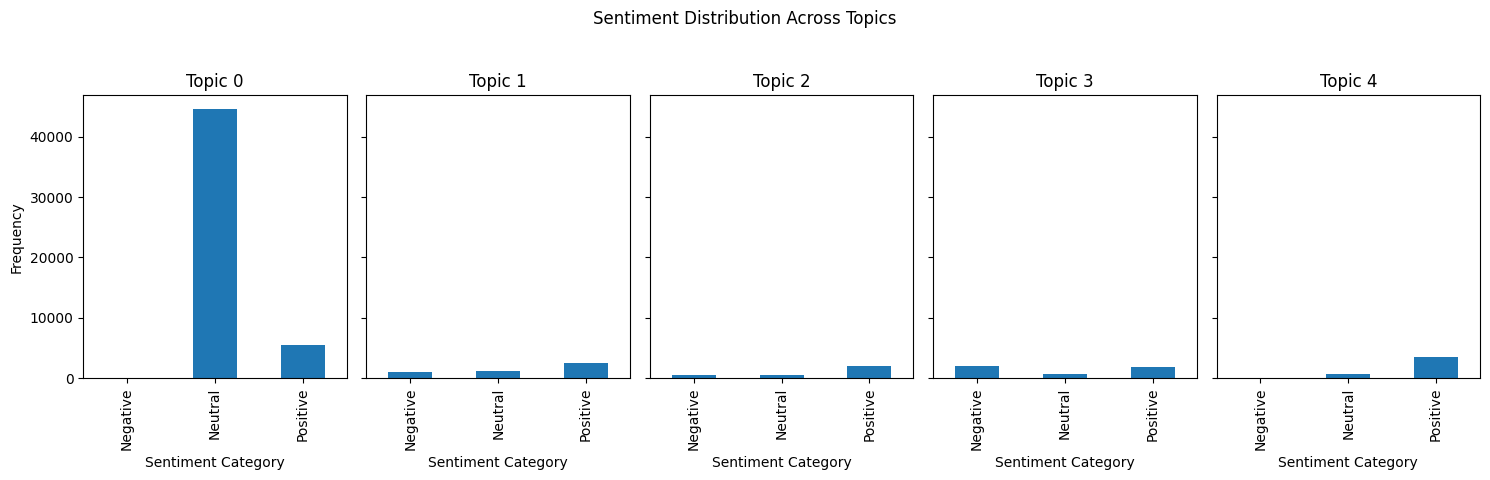

In [ ]:
# Plotting
fig, axes = plt.subplots(ncols=len(topic_sentiment_distribution.index), figsize=(15, 5), sharey=True)
fig.suptitle('Sentiment Distribution Across Topics')

for idx, (topic, sentiment_counts) in enumerate(topic_sentiment_distribution.iterrows()):
    ax = axes[idx]
    sentiment_counts.plot(kind='bar', ax=ax, title=f'Topic {topic}')
    ax.set_xlabel('Sentiment Category')
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### **For Pie Chart**

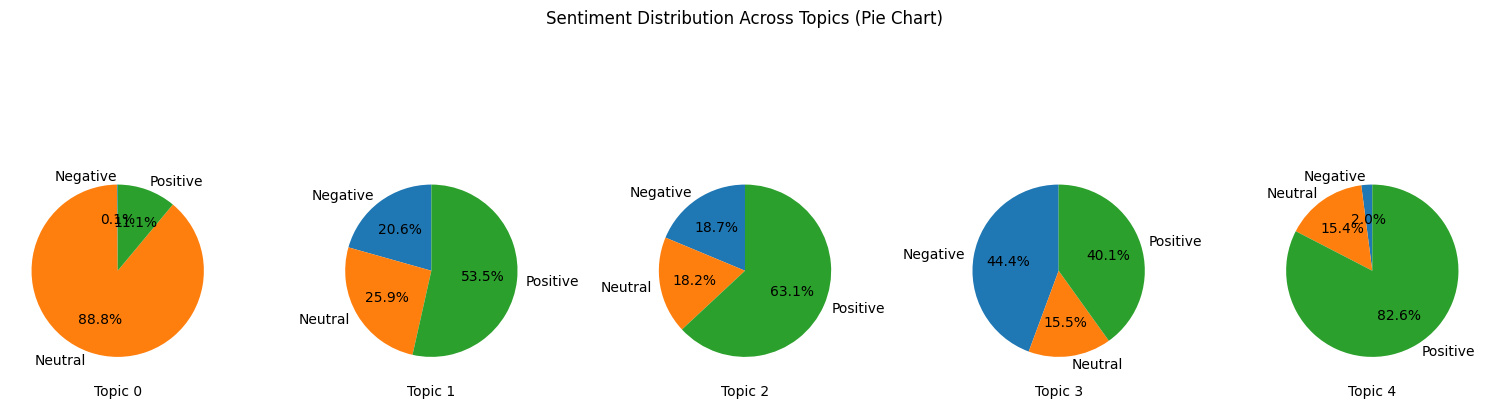

In [41]:
# Pie charts for each topic's sentiment distribution
fig, axes = plt.subplots(ncols=len(topic_sentiment_distribution.index), figsize=(15, 5))
fig.suptitle('Sentiment Distribution Across Topics (Pie Chart)')

for idx, (topic, sentiment_counts) in enumerate(topic_sentiment_distribution.iterrows()):
    ax = axes[idx]
    sentiment_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_ylabel('')
    ax.set_xlabel(f'Topic {topic}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
